## Exploring customer churn

Now that you know what customer churn is, let's examine the structure of our customer dataset, which has been pre-loaded into a DataFrame called telco. Being able to check the structure of the data is a fundamental step in the churn modeling process and is often overlooked.

Use pandas methods such as .info() to get a sense for its structure and notice the different columns (also known as "features" in machine learning), such as 'CustServ_Calls', which denotes the number of customer service calls the customer made, and 'State', which indicates the state the customer is from.

One feature is of particular interest to us: 'Churn', which can take in two values - yes and no - indicating whether or not the customer has churned. In this exercise, your job is to explore this feature. You can access it using telco['Churn'].

How many churners does the dataset have, and how many non-churners? To easily answer this, you can use the .value_counts() method on telco['Churn'].

Possible Answers
- 2850 Churners and 483 Non-Churners.
- 21 Churners and 3312 Non-Churners.
- 483 Churners and 2850 Non-Churners.
- 727 Churners and 2606 Non-Churners

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from IPython.core.display import HTML
import numpy as np

In [52]:
telco = pd.read_csv('/Users/Andrew/Downloads/(DataCamp) Marketing Analytics Predicting Customer Churn in Python/Churn.csv')
telco.head()


,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


In [4]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   object 
 8   Intl_Plan       3333 non-null   object 
 9   Vmail_Plan      3333 non-null   object 
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 non-null   f

In [5]:
telco.nunique()

Account_Length     212
Vmail_Message       46
Day_Mins          1667
Eve_Mins          1611
Night_Mins        1591
Intl_Mins          162
CustServ_Calls      10
Churn                2
Intl_Plan            2
Vmail_Plan           2
Day_Calls          119
Day_Charge        1667
Eve_Calls          123
Eve_Charge        1440
Night_Calls        120
Night_Charge       933
Intl_Calls          21
Intl_Charge        162
State               51
Area_Code            3
Phone             3333
dtype: int64

In [6]:
telco.describe()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Area_Code
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581,437.182418
std,39.822106,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773,42.371290
min,1.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,408.000000
25%,74.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,408.000000
50%,101.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,415.000000
75%,127.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,510.000000
max,243.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,510.000000


In [7]:
telco['Churn'].value_counts()

no     2850
yes     483
Name: Churn, dtype: int64

Indeed! It looks like there are far more Non-Churners than Churners in our dataset.


## Summary statistics for both classes

Consider the following .groupby() code:

#Group by x and compute the standard deviation

df.groupby(['x']).std()

Here, a DataFrame df is grouped by a column 'x', and then the standard deviation is calculated across all columns of df for each value of 'x'. The .groupby() method is incredibly useful when you want to investigate specific columns of your dataset. Here, you're going to explore the 'Churn' column further to see if there are differences between churners and non-churners. A subset version of the telco DataFrame, consisting of the columns 'Churn', 'CustServ_Calls', and 'Vmail_Message' is available in your workspace.

If you need a refresher on how .groupby() works, please refer back to the pre-requisite Manipulating DataFrames with pandas course.

Instructions 1/3
- Group telco by 'Churn' and compute the mean.

In [13]:
telco_small = telco[['CustServ_Calls','Vmail_Message','Churn']]
telco_small.head()

,CustServ_Calls,Vmail_Message,Churn
0,1,25,no
1,1,26,no
2,0,0,no
3,2,0,no
4,3,0,no


In [14]:
# Group telco by 'Churn' and compute the mean
print(telco_small.groupby(['Churn']).mean())

       CustServ_Calls  Vmail_Message
Churn                               
no           1.449825       8.604561
yes          2.229814       5.115942


- Adapt your code to compute the standard deviation instead of the mean.

In [15]:
# Adapt your code to compute the standard deviation
print(telco_small.groupby(['Churn']).std())

       CustServ_Calls  Vmail_Message
Churn                               
no           1.163883      13.913125
yes          1.853275      11.860138


### Question
Based on the results you see in the IPython Shell, select the correct statement from the options below.

Possible Answers
- Churners leave more voice mail messages than non-churners.
- Churners make more customer service calls than non-churners. +

Yes! Perhaps unsurprisingly, churners seem to make more customer service calls than non-churners.
- Churners leave fewer voice mail messages than non-churners.

Incorrect Submission
Not quite. Have a look at the output in the IPython Shell again.
- Churners make fewer customer service calls than non-churners.

## Churn by State

When dealing with customer data, geographic regions may play an important part in determining whether a customer will cancel their service or not. You may have noticed that there is a 'State' column in the dataset. In this exercise, you'll group 'State' and 'Churn' to count the number of churners and non-churners by state. For example, if you wanted to group by x and aggregate by y, you could use .groupby() as follows:

df.groupby('x')['y'].value_counts()

Instructions 1/2
- Group telco by 'State', aggregate by 'Churn', and then use value_counts() to count the number of churners and non-churners by state.

In [33]:
# Count the number of churners and non-churners by State
telco.groupby(by='State')['Churn'].value_counts()
# the same
# telco.groupby(by=['State','Churn']).agg({'Area_Code':'count'})

State  Churn
AK     no       49
       yes       3
AL     no       72
       yes       8
AR     no       44
                ..
WI     yes       7
WV     no       96
       yes      10
WY     no       68
       yes       9
Name: Churn, Length: 102, dtype: int64

In [35]:
telco.groupby(by='State')['Churn'].value_counts().unstack(level=1).filter(items=['CA','CO','AL'],axis=0)

Churn,no,yes
State,,
CA,25,9
CO,57,9
AL,72,8


### Question
Take a look at the output in the IPython Shell and select the correct statement from the options below.

Possible Answers
- California (CA) has 25 non-churners and 9 churners.+
- Colorado (CO) has 9 non-churners and 57 churners.
- Alabama (AL) has 49 non-churners and 3 churners.

Indeed! While California is the most populous state in the U.S, there are not as many customers from California in our dataset. Arizona (AZ), for example, has 64 customers, 4 of whom ended up churning. In comparison, California has a higher number (and percentage) of customers who churned. This is useful information for a company!

## Exploring your data using visualizations

3 Exploring your data using visualizations.mp4

### Exploring feature distributions

You saw in the video that the 'Account_Length' feature was normally distributed. Let's now visualize the distributions of the following features using seaborn's distribution plot:

'Day_Mins'
'Eve_Mins'
'Night_Mins'
'Intl_Mins'
To create a feature's distribution plot, pass it in as an argument to sns.distplot(). The Telco dataset is available to you as a DataFrame called telco.

Instructions 1/4
- Visualize the distribution of 'Day_Mins'.

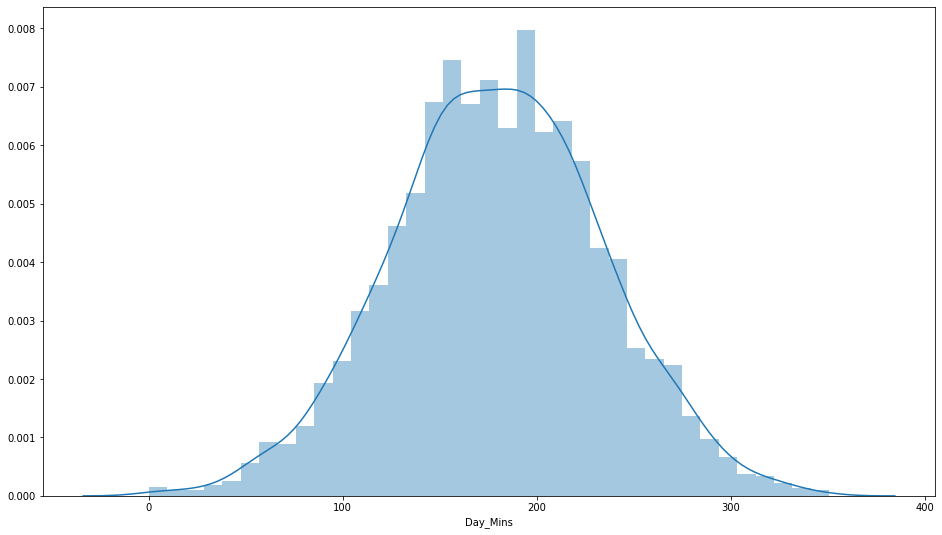

In [41]:
fig,ax = plt.subplots(figsize=(16,9))
sns.distplot(a = telco['Day_Mins'],ax=ax)
plt.show()

In [39]:
?sns.distplot

- Update your code to visualize the distribution of 'Eve_Mins'.

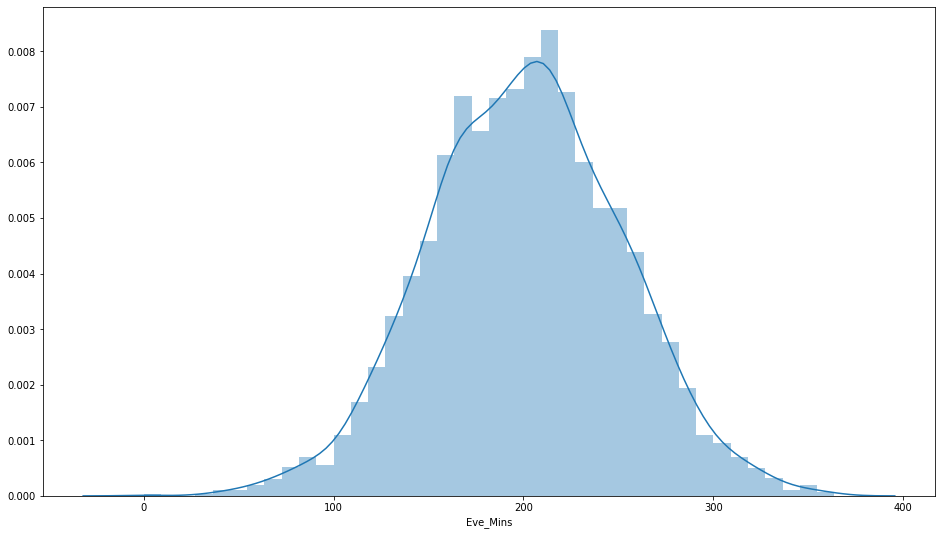

In [35]:
fig,ax = plt.subplots(figsize=(16,9))
sns.distplot(a = telco['Eve_Mins'],ax=ax)
plt.show()

- Update your code to visualize the distribution of 'Night_Mins'.

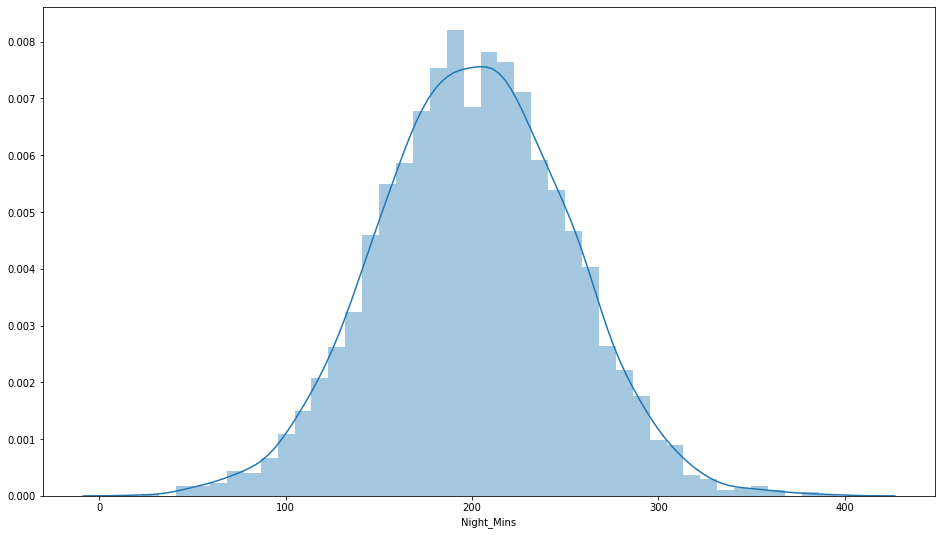

In [36]:
fig,ax = plt.subplots(figsize=(16,9))
sns.distplot(a = telco['Night_Mins'],ax=ax)
plt.show()

- Update your code to visualize the distribution of 'Intl_Mins'.

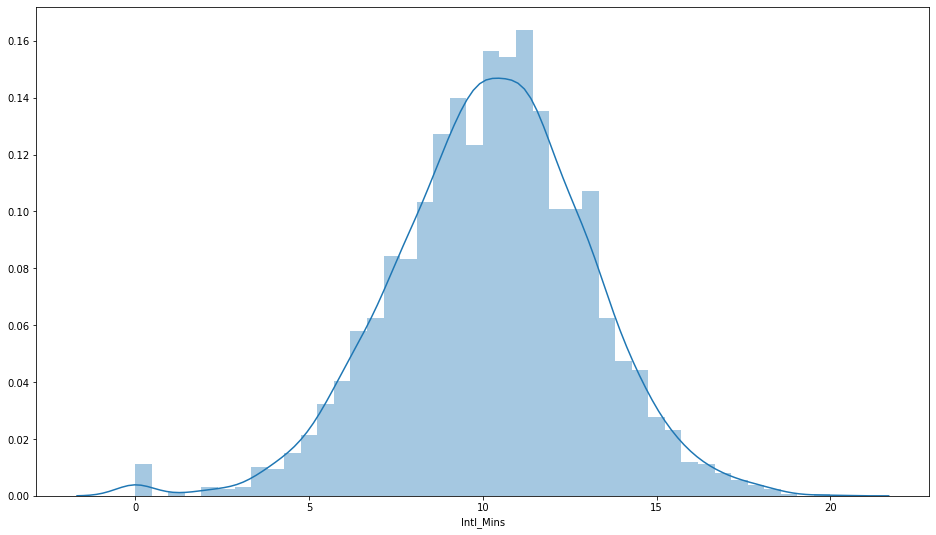

In [37]:
fig,ax = plt.subplots(figsize=(16,9))
sns.distplot(a = telco['Intl_Mins'],ax=ax)
plt.show()

Well done! All of these features appear to be well approximated by the normal distribution. If this were not the case, we would have to consider applying a feature transformation of some kind.

## Customer service calls and churn

You've already seen that there's not much of a difference in account lengths between churners and non-churners, but that there is a difference in the number of customer service calls left by churners.

Let's now visualize this difference using a box plot and incorporate other features of interest - do customers who have international plans make more customer service calls? Or do they tend to churn more? How about voicemail plans? Let's find out!

Recall the syntax for creating a box plot using seaborn:

sns.boxplot(x = "X-axis variable",
            y = "Y-axis variable",
            data = DataFrame)

If you want to remove outliers, you can specify the additional parameter sym="", and you can add a third variable using hue.
Instructions 1/4
- Create a box plot with 'Churn' on the x-axis and 'CustServ_Calls' on the y-axis.

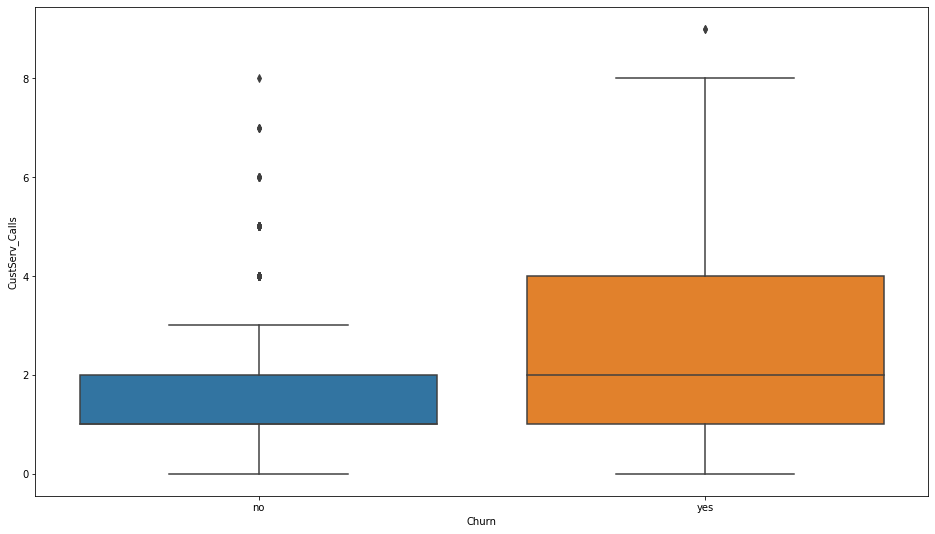

In [42]:
fig,ax = plt.subplots(figsize=(16,9))
sns.boxplot(x='Churn',y='CustServ_Calls',data=telco,ax=ax)
plt.show()

- There is a very noticeable difference here between churners and non-churners! Now, remove the outliers from the box plot.

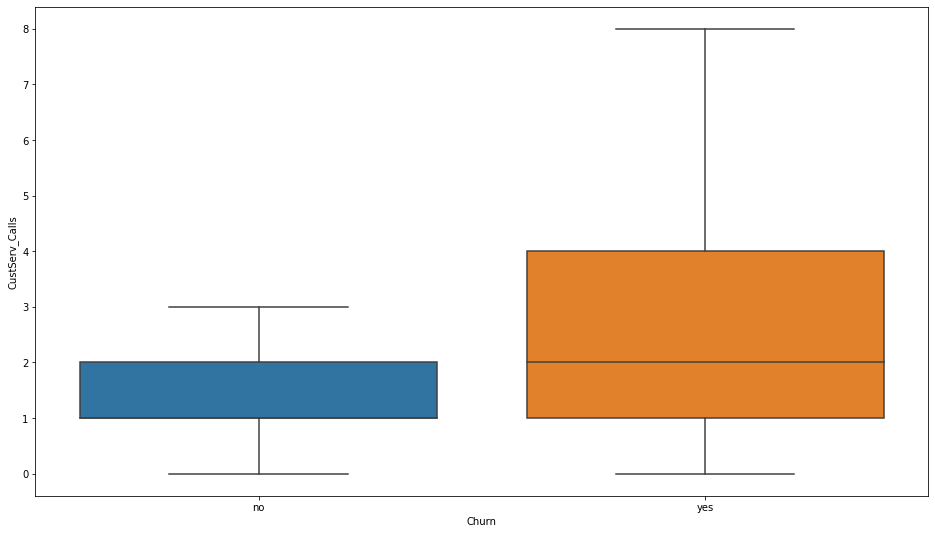

In [44]:
fig,ax = plt.subplots(figsize=(16,9))
sns.boxplot(x='Churn',y='CustServ_Calls',data=telco,sym='',ax=ax)
plt.show()

- Add a third variable to this plot - 'Vmail_Plan' - to visualize whether or not having a voice mail plan affects the number of customer service calls or churn.

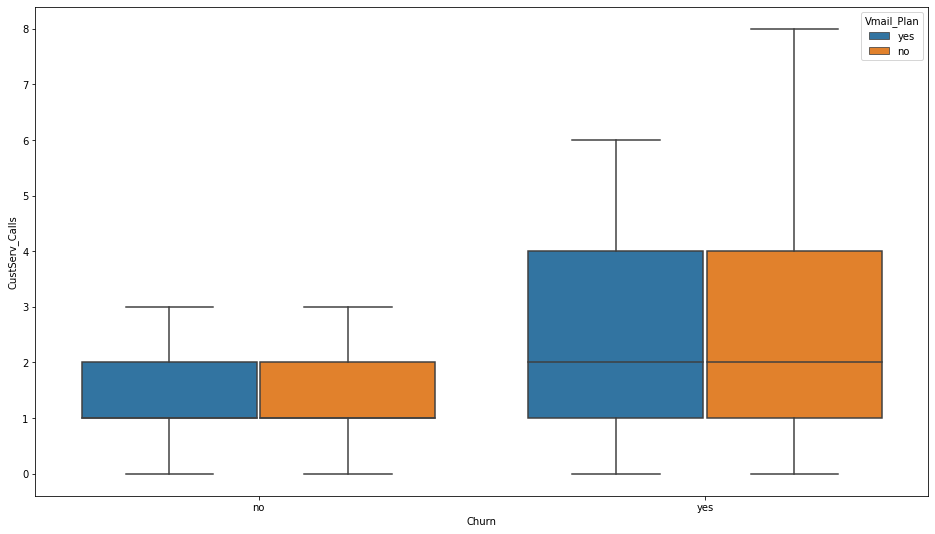

In [46]:
fig,ax = plt.subplots(figsize=(16,9))
sns.boxplot(x='Churn',
            y='CustServ_Calls',
            data=telco,
            sym='',
            hue='Vmail_Plan',
            ax=ax)
plt.show()

- Not much of a difference there. Update your code so that the third variable is 'Intl_Plan' instead.

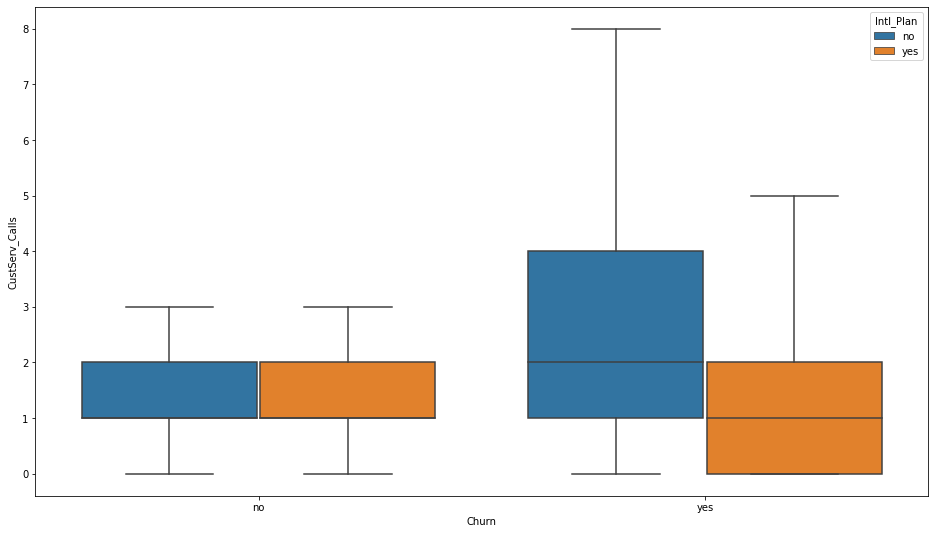

In [36]:
fig,ax = plt.subplots(figsize=(16,9))
sns.boxplot(x='Churn',
            y='CustServ_Calls',
            data=telco,
            sym='',
            hue='Intl_Plan',
            ax=ax)
plt.show()

Excellent work, and congratulations on completing Chapter 1! There are some very interesting insights here. It looks like customers who do churn end up leaving more customer service calls, unless these customers also have an international plan, in which case they leave fewer customer service calls. This type of information is really useful in better understanding the drivers of churn. It's now time to learn about how to preprocess your data prior to modeling.

In [54]:
#telco['Churn'] = telco['Churn'].map({'yes':True,'no':False}) # use only once
#print(telco['Churn'].unique())
telco.groupby(by=['Intl_Plan','Churn'])['CustServ_Calls'].mean().unstack(level=1)

[False  True]


Churn,False,True
Intl_Plan,,
no,1.456081,2.476879
yes,1.360215,1.605839


## Data preprocessing

4 Data preprocessing.mp4

## Identifying features to convert

As Mark explained in the video, it is preferable to have features like 'Churn' encoded as 0 and 1 instead of no and yes, so that you can then feed it into machine learning algorithms that only accept numeric values.

Besides 'Churn', other features that are of type object can be converted into 0s and 1s. In this exercise, your job is to explore the different data types of telco in the IPython Shell and identify the ones that are of type object.

Instructions
Possible Answers
- Vmail_Plan, Churn, Intl_Plan, Night_Charge.
- Churn, Intl_Plan, Vmail_Plan, State. +
- Churn, Eve_Charge, Intl_Plan, Vmail_Plan, State.
- State, Churn, Intl_Plan, Vmail_Plan, CustServ_Calls

In [56]:
telco.info()
#telco.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   bool   
 8   Intl_Plan       3333 non-null   object 
 9   Vmail_Plan      3333 non-null   object 
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 non-null   f

Indeed! Churn, Vmail_Plan, and Intl_Plan, in particular, are binary features that can easily be converted into 0s and 1s. This is what you'll do in the next exercise.

## Encoding binary features

Recasting data types is an important part of data preprocessing. In this exercise you will assign the values 1 to 'yes' and 0 to 'no' to the 'Vmail_Plan' and 'Churn' features, respectively.

You saw two approaches to doing this in the video - one using pandas, and the other using scikit-learn. For straightforward tasks like this, sticking with pandas is recommended, so that's what we'll do in this exercise. If you're trying to build machine learning pipelines, on the other hand - which is beyond the scope of this course - you can explore using LabelEncoder(). When doing data science, it's important to be aware that there is always more than one way to accomplish a task, and you need to pick the one that is most effective for your application.

Instructions
- Replace 'no' with 0 and 'yes' with 1 in the 'Vmail_Plan' column of telco.
- Do the same for the 'Churn' column.

In [49]:
telco[['Churn','Vmail_Plan']].head()

,Churn,Vmail_Plan
0,no,yes
1,no,yes
2,no,no
3,no,no
4,no,no


In [86]:
#telco['Churn'] = telco['Churn'].replace({'yes':1,'no':0})
telco['Churn'] = telco['Churn'].replace({True:1,False:0})
telco['Vmail_Plan'] = telco['Vmail_Plan'].replace({'yes':1,'no':0})
telco[['Churn','Vmail_Plan']].head()

,Churn,Vmail_Plan
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


Wonderful! With these features encoded as 0 and 1, you can now use them in machine learning algorithms.

In [67]:
from sklearn.preprocessing import LabelEncoder

LabelEncoder().fit_transform(y=telco['Vmail_Plan'])[:5]

array([1, 1, 0, 0, 0])

In [61]:
?LabelEncoder.fit_transform

## One hot encoding

In the video, you saw how the 'State' feature can be encoded numerically using the technique of one hot encoding:

![title](img/ohe_part3.png)

Doing this manually would be quite tedious, especially when you have 50 states and over 3000 customers! Fortunately, pandas has a get_dummies() function which automatically applies one hot encoding over the selected feature.

Instructions 1/2
- Use the pd.get_dummies() function to apply one hot encoding on the 'State' feature of telco.

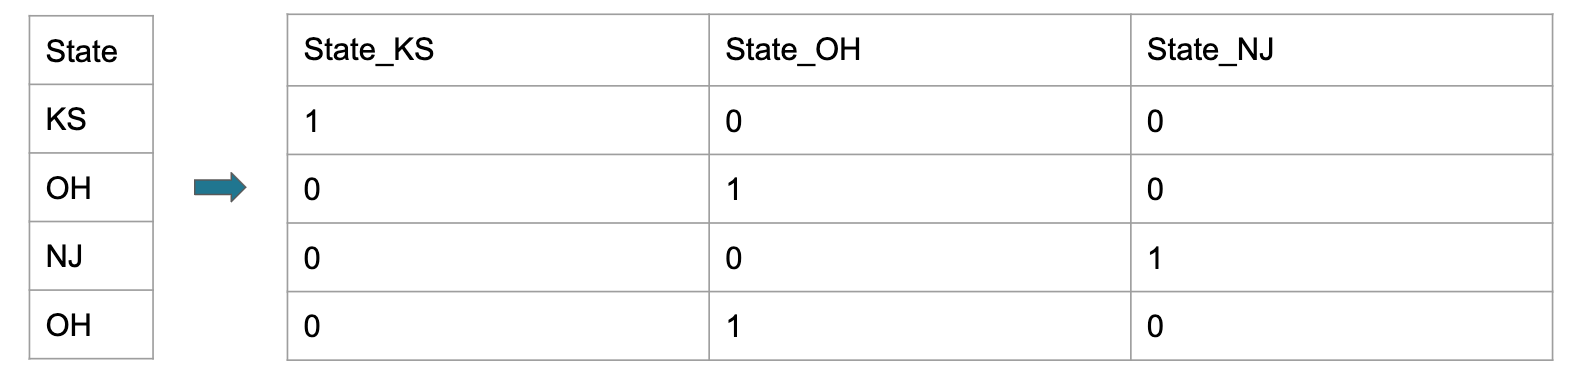

In [53]:

Image(filename="/Users/Andrew/Downloads/(DataCamp) Marketing Analytics Predicting Customer Churn in Python/ohe_part3.png",width=400,height=200)


In [87]:
telco_state = pd.get_dummies(telco['State'])
telco_state.head()

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Excellent work! Notice that this creates an entirely new DataFrame. Once you merge this back into the original telco DataFrame, you can begin using these state features in your models. Do note, however, that we now have many more features in our dataset, so we should consider dropping any that are unnecessary.

## Feature scaling

Recall from the video the different scales of the 'Intl_Calls' and 'Night_Mins' features:

![title](img/ohe_part3_2.png)

Your job in this exercise is to re-scale them using StandardScaler.

In your workspace, the telco DataFrame has been subset to only include the features you want to rescale: 'Intl_Calls' and 'Night_Mins'. To apply StandardScaler, you need to first instantiate it using StandardScaler(), and then apply the fit_transform() method, passing in the DataFrame you want to rescale. You can do this in one line of code:

StandardScaler().fit_transform(df)
Instructions
100 XP
Scale telco using StandardScaler() and .fit_transform().
Print the summary statistics of telco_scaled_df using .describe().

In [88]:
telco_1 = telco[['Intl_Calls','Night_Mins']]
telco_1.head()

,Intl_Calls,Night_Mins
0,3,244.7
1,3,254.4
2,5,162.6
3,7,196.9
4,3,186.9


In [89]:
# 1
from sklearn.preprocessing import StandardScaler

telco_scaled = StandardScaler().fit_transform(telco_1)
telco_scaled = pd.DataFrame(telco_scaled, columns=["Intl_Calls", "Night_Mins"])
telco_scaled.head()


,Intl_Calls,Night_Mins
0,-0.601195,0.866743
1,-0.601195,1.058571
2,0.211534,-0.756869
3,1.024263,-0.078551
4,-0.601195,-0.276311


In [73]:
# 2
telco_scaled_1 = (telco_1 - telco_1.mean()) / telco_1.std()
telco_scaled_1.head()

,Intl_Calls,Night_Mins
0,-0.601105,0.866613
1,-0.601105,1.058412
2,0.211502,-0.756756
3,1.024109,-0.078539
4,-0.601105,-0.276270


In [61]:
telco_scaled.describe()

,Intl_Calls,Night_Mins
count,3.333000e+03,3.333000e+03
mean,-8.527366e-18,7.887813e-17
std,1.000150e+00,1.000150e+00
min,-1.820289e+00,-3.513648e+00
25%,-6.011951e-01,-6.698545e-01
50%,-1.948306e-01,6.485803e-03
75%,6.178983e-01,6.808485e-01
max,6.307001e+00,3.839081e+00


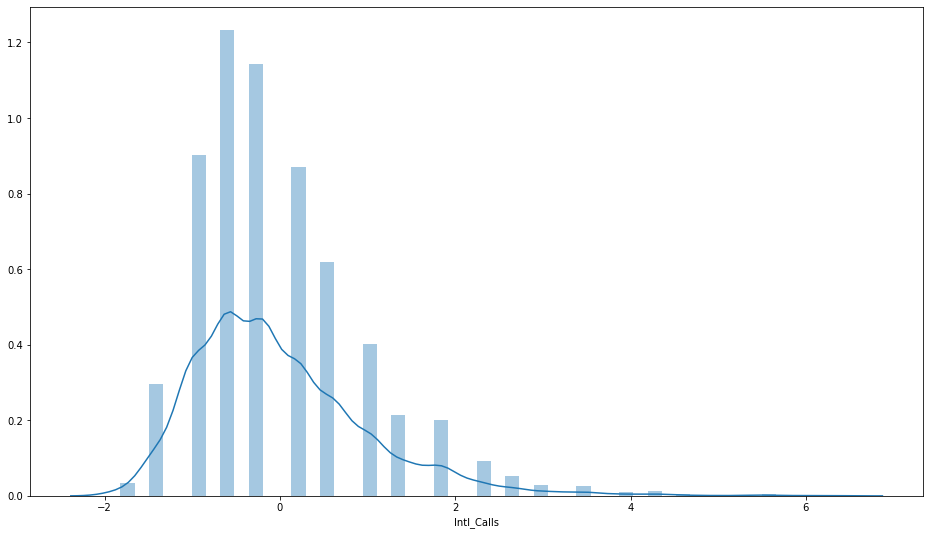

In [65]:
fig,ax = plt.subplots(figsize=(16,9))
sns.distplot(a=telco_scaled['Intl_Calls'])
#sns.distplot(a=telco['Intl_Calls']) # not scaled version
plt.show()

Great work! Both features are now on the same scale. In practice, you'll need to carefully ensure this is the case for all features of interest. Next up: feature selection and feature engineering. See you in the next video!

## Feature selection and engineering
5 Feature selection and engineering.mp4

### Dropping unnecessary features

Some features such as 'Area_Code' and 'Phone' are not useful when it comes to predicting customer churn, and they need to be dropped prior to modeling. The easiest way to do so in Python is using the .drop() method of pandas DataFrames, just as you saw in the video, where 'Soc_Sec' and 'Tax_ID' were dropped:

telco.drop(['Soc_Sec', 'Tax_ID'], axis=1)
Here, axis=1 indicates that you want to drop 'Soc_Sec' and 'Tax_ID' from the columns.

Instructions 1/2
- Drop 'Area_Code' and 'Phone' from telco.

In [75]:
telco.columns.values

array(['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins',
       'Night_Mins', 'Intl_Mins', 'CustServ_Calls', 'Churn', 'Intl_Plan',
       'Vmail_Plan', 'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge',
       'Night_Calls', 'Night_Charge', 'Intl_Calls', 'Intl_Charge',
       'State', 'Area_Code', 'Phone'], dtype=object)

In [76]:
telco.drop(['Area_Code','Phone'],axis=1,inplace=True)
# Verify that the features got dropped by printing telco.columns
telco.columns.values

array(['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins',
       'Night_Mins', 'Intl_Mins', 'CustServ_Calls', 'Churn', 'Intl_Plan',
       'Vmail_Plan', 'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge',
       'Night_Calls', 'Night_Charge', 'Intl_Calls', 'Intl_Charge',
       'State'], dtype=object)

In [149]:
# Highly correlated features also can be dropped
# They provide no additional information to the model
telco.corr()
# here DayMins & Day_Charge, Eve_Mins & Eve_Charge, Night_Mins & Night_Charge, Intl_Mins & Intl_Charge are highly correlated


,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Avg_Night_Calls
Account_Length,1.000000,-0.004628,0.006216,-0.006757,-0.008955,0.009514,-0.003796,0.016541,0.024735,0.002918,0.038470,0.006214,0.019260,-0.006745,-0.013176,-0.008960,0.020661,0.009546,-0.004067
Vmail_Message,-0.004628,1.000000,0.000778,0.017562,0.007681,0.002856,-0.013263,-0.089728,0.008745,0.956927,-0.009548,0.000776,-0.005864,0.017578,0.007123,0.007663,0.013957,0.002884,0.003061
Day_Mins,0.006216,0.000778,1.000000,0.007043,0.004323,-0.010155,-0.013423,0.205151,0.049396,-0.001684,0.006750,1.000000,0.015769,0.007029,0.022972,0.004300,0.008033,-0.010092,-0.011777
Eve_Mins,-0.006757,0.017562,0.007043,1.000000,-0.012584,-0.011035,-0.012985,0.092796,0.019100,0.021545,-0.021451,0.007050,-0.011430,1.000000,0.007586,-0.012593,0.002541,-0.011067,-0.011740
Night_Mins,-0.008955,0.007681,0.004323,-0.012584,1.000000,-0.015207,-0.009288,0.035493,-0.028905,0.006079,0.022938,0.004324,-0.002093,-0.012592,0.011204,0.999999,-0.012353,-0.015180,0.738404
Intl_Mins,0.009514,0.002856,-0.010155,-0.011035,-0.015207,1.000000,-0.009640,0.068239,0.045871,-0.001318,0.021565,-0.010157,0.008703,-0.011043,-0.013605,-0.015214,0.032304,0.999993,-0.001844
CustServ_Calls,-0.003796,-0.013263,-0.013423,-0.012985,-0.009288,-0.009640,1.000000,0.208750,-0.024522,-0.017824,-0.018942,-0.013427,0.002423,-0.012987,-0.012802,-0.009277,-0.017561,-0.009675,-0.000153
Churn,0.016541,-0.089728,0.205151,0.092796,0.035493,0.068239,0.208750,1.000000,0.259852,-0.102148,0.018459,0.205151,0.009233,0.092786,0.006141,0.035496,-0.052844,0.068259,0.023433
Intl_Plan,0.024735,0.008745,0.049396,0.019100,-0.028905,0.045871,-0.024522,0.259852,1.000000,0.006006,0.003755,0.049398,0.006114,0.019106,0.012451,-0.028913,0.017366,0.045780,-0.029635
Vmail_Plan,0.002918,0.956927,-0.001684,0.021545,0.006079,-0.001318,-0.017824,-0.102148,0.006006,1.000000,-0.011086,-0.001686,-0.006444,0.021559,0.015553,0.006064,0.007618,-0.001276,-0.004060


In [152]:
?pd.DataFrame.corr

Nicely done! Why don't we use unique identifiers such as phone numbers in our churn model? They don't provide any predictive power.

## Engineering a new column

Leveraging domain knowledge to engineer new features is an essential part of modeling. This quote from Andrew Ng summarizes the importance of feature engineering:

"Coming up with features is difficult, time-consuming, requires expert knowledge. 'Applied machine learning' is basically feature engineering."

Your job in this exercise is to create a new feature that contains information about the average length of night calls made by customers.

Instructions
- Create a new feature - 'Avg_Night_Calls' - that is the result of dividing 'Night_Mins by 'Night_Calls'.
- Print the first five rows of this new feature.

In [90]:
# Create the new feature
telco['Avg_Night_Calls'] = telco['Night_Mins'] / telco['Night_Calls']

# Print the first five rows of 'Avg_Night_Calls'
print(telco[['Night_Mins','Night_Calls','Avg_Night_Calls']].head())

   Night_Mins  Night_Calls  Avg_Night_Calls
0       244.7           91         2.689011
1       254.4          103         2.469903
2       162.6          104         1.563462
3       196.9           89         2.212360
4       186.9          121         1.544628


Well done! Leveraging your domain knowledge is crucial in churn modeling.

## Making Predictions
6 Making Predictions.mp4

## Predicting whether a new customer will churn

As you saw in the video, to train a model using sklearn:

- Import the model of interest - here, a Support Vector Classifier:
from sklearn.svm import SVC
- Instantiate it:
svc = SVC()
- Train it, or "fit it", to the data:
svc.fit(telco['data'], telco['target'])

Here, the first argument consists of the features, while the second argument is the label that we are trying to predict - whether or not the customer will churn. After you've fitted the model, you can use the model's .predict() method to predict the label of a new customer.

This process is true no matter which model you use, and sklearn has many! In this exercise, you'll use LogisticRegression.

Instructions 1/4
- From sklearn.linear_model, import LogisticRegression.

In [80]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

- Instantiate LogisticRegression(), storing the result in clf (short for classifier).

In [81]:
# Instantiate the classifier
clf = LogisticRegression()

- Fit clf to the data. Here, the features are contained in the features variable, and the target variable of interest is 'Churn'.

In [82]:
# AK: select features automatically
features = telco.columns.drop(['Churn','State','Avg_Night_Calls']).values
print(features)
print(features.shape)
# select features manually
features = ['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins', 'Intl_Mins', 'CustServ_Calls', 'Intl_Plan', 'Vmail_Plan', 'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge','Night_Calls', 'Night_Charge', 'Intl_Calls', 'Intl_Charge']
print(features)
print(len(features))

['Account_Length' 'Vmail_Message' 'Day_Mins' 'Eve_Mins' 'Night_Mins'
 'Intl_Mins' 'CustServ_Calls' 'Intl_Plan' 'Vmail_Plan' 'Day_Calls'
 'Day_Charge' 'Eve_Calls' 'Eve_Charge' 'Night_Calls' 'Night_Charge'
 'Intl_Calls' 'Intl_Charge']
(17,)
['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins', 'Intl_Mins', 'CustServ_Calls', 'Intl_Plan', 'Vmail_Plan', 'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge', 'Night_Calls', 'Night_Charge', 'Intl_Calls', 'Intl_Charge']
17


In [93]:
print(telco[features].head())
# Intl_Plan is not (0,1), model fit doesn't work, let's replace
#telco['Intl_Plan'] = telco['Intl_Plan'].replace({'no':0,'yes':1})
print(telco['Intl_Plan'].head())

   Account_Length  Vmail_Message  Day_Mins  Eve_Mins  Night_Mins  Intl_Mins  \
0             128             25     265.1     197.4       244.7       10.0   
1             107             26     161.6     195.5       254.4       13.7   
2             137              0     243.4     121.2       162.6       12.2   
3              84              0     299.4      61.9       196.9        6.6   
4              75              0     166.7     148.3       186.9       10.1   

   CustServ_Calls  Intl_Plan  Vmail_Plan  Day_Calls  Day_Charge  Eve_Calls  \
0               1          0           1        110       45.07         99   
1               1          0           1        123       27.47        103   
2               0          0           0        114       41.38        110   
3               2          1           0         71       50.90         88   
4               3          1           0        113       28.34        122   

   Eve_Charge  Night_Calls  Night_Charge  Intl_Calls  In

In [94]:
# Fit the classifier
clf.fit(telco[features], telco['Churn'])

/Users/Andrew/Documents/python/env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

- The features of a new customer are contained in the variable new_customer. Use your fitted classifier to predict whether or not this customer will churn.

In [96]:
new_customer = pd.DataFrame(data={
    'Account_Length': [91],
    'Vmail_Message': [23],
    'Day_Mins': [232.4],
    'Eve_Mins': [186.0],
    'Night_Mins': [190.5],
    'Intl_Mins': [12.3],
    'CustServ_Calls': [3],
    'Intl_Plan': [0],
    'Vmail_Plan': [1],
    'Day_Calls': [97],
    'Day_Charge': [39.51],
    'Eve_Calls': [88],
    'Eve_Charge': [15.81],
    'Night_Calls': [128],
    'Night_Charge': [8.57],
    'Intl_Calls': [3],
    'Intl_Charge': [3.32]
})

new_customer = pd.DataFrame(data= np.array([[91.0,23.0,232.4,186.0,190.5,12.3,3.0,0.0,1.0,97.0,39.51,88.0,15.81,128.0,8.57,3.0,3.32]]),
                            columns= ['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins', 'Intl_Mins', 'CustServ_Calls', 'Intl_Plan', 'Vmail_Plan', 'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge','Night_Calls', 'Night_Charge', 'Intl_Calls', 'Intl_Charge'])
new_customer



,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
0,91.0,23.0,232.4,186.0,190.5,12.3,3.0,0.0,1.0,97.0,39.51,88.0,15.81,128.0,8.57,3.0,3.32


In [97]:
print(clf.predict(new_customer))

[0]


## Training another scikit-learn model

All sklearn models have .fit() and .predict() methods like the one you used in the previous exercise for the LogisticRegression model. This feature allows you to easily try many different models to see which one gives you the best performance. To get you more confident with using the sklearn API, in this exercise you'll try fitting a DecisionTreeClassifier instead of a LogisticRegression.

Instructions
- Import DecisionTreeClassifier from sklearn.tree.
- Instantiate the classifier, storing the result in clf.
- Train the classifier to the data. The features are contained in the features variable, and the target variable of interest is 'Churn'.
- Predict the label of new_customer.

In [98]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Instantiate the classifier
clf = DecisionTreeClassifier()

# Fit the classifier
clf.fit(telco[features],telco['Churn'])

# Predict the label of new_customer
print(clf.predict(new_customer))

[0]


Great work! Let's now learn about how to evaluate model performance when you have more data.

## Evaluating Model Performance
7 Evaluating Model Performance.mp4

### Creating training and test sets

Before you create any model, it is important to split your dataset into two: a training set which will be used to build your churn model, and a test set which will be used to validate your model. To do this, you can use the train_test_split() function from sklearn.model_selection.

You'll practice creating training and test sets in this exercise. The telco DataFrame is available in your workspace.

Instructions 1/4
- Import train_test_split from sklearn.model_selection.

In [102]:
# Import train_test_split
from sklearn.model_selection import train_test_split

- Create a feature variable X which holds all of the features of telco by dropping the target variable 'Churn' from telco.

In [99]:
# Create feature variable
X = telco.drop(['Churn', 'State','Avg_Night_Calls'], axis=1)
print(X.shape)
#print(X.columns)
X.head()


(3333, 17)


,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
0,128,25,265.1,197.4,244.7,10.0,1,0,1,110,45.07,99,16.78,91,11.01,3,2.70
1,107,26,161.6,195.5,254.4,13.7,1,0,1,123,27.47,103,16.62,103,11.45,3,3.70
2,137,0,243.4,121.2,162.6,12.2,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29
3,84,0,299.4,61.9,196.9,6.6,2,1,0,71,50.90,88,5.26,89,8.86,7,1.78
4,75,0,166.7,148.3,186.9,10.1,3,1,0,113,28.34,122,12.61,121,8.41,3,2.73


- Create a target variable y which holds the values of the target variable - 'Churn'.

In [100]:
# Create target variable
Y = telco['Churn']

- Split your model into training and testing sets such that 70% of the data is used for training. Unpack the result into X_train, X_test, y_train, and y_test.

In [104]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3)
#print(X_train.head())
#print(X_test.head())
#print(Y_train.head())
#print(Y_test.head())

In [159]:
?train_test_split

### Check each sets length

Just to make sure train_test_split() worked as you expected it to, check the lengths of X_train and X_test to see how many records are in each set. You can use functions like len() or attributes like .shape to explore this.

Instructions
- 2666 Train set, 660 Test set.
- 2669 Train set, 668 Test set.
- 2333 Train set, 1000 Test set.+
- 2662 Train set, 667 Test set.



In [105]:
print(len(X_train))
print(len(X_test))

2333
1000


### Computing accuracy

Having split your data into training and testing sets, you can now fit your model to the training data and then predict the labels of the test data. That's what you'll practice doing in this exercise.

So far, you've used Logistic Regression and Decision Trees. Here, you'll use a RandomForestClassifier, which you can think of as an ensemble of Decision Trees that generally outperforms a single Decision Tree.

Your work in the previous exercises has carried over, and the training and test sets are available in the variables X_train, X_test, y_train, and y_test.

Instructions
- Import RandomForestClassifier from sklearn.ensemble.
- Instantiate a RandomForestClassifier as clf.
- Fit clf to the training data: X_train and y_train.
- Compute the accuracy of clf on the testing data using the .score() method.

In [114]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier
clf_rf = RandomForestClassifier()

# Fit to the training data
clf_rf.fit(X_train,Y_train)

# Compute accuracy
print(clf_rf.score(X_test, Y_test))

0.953


In [111]:
from sklearn.svm import SVC

clf_svc = SVC()
clf_svc.fit(X_train, Y_train)
clf_svc.score(X_test, Y_test)

0.861

In [108]:
clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train)
clf.score(X_test, Y_test)

0.901

In [113]:
clf_lg = LogisticRegression()
clf_lg.fit(X_train, Y_train)
clf_lg.score(X_test, Y_test)

/Users/Andrew/Documents/python/env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.857

Excellent work! Looks like this random forest classifier outperforms the support vector classifier.

## Model Metrics

8 Model Metrics.mp4

### Confusion matrix

Using scikit-learn's confusion_matrix() function, you can easily create your classifier's confusion matrix and gain a more nuanced understanding of its performance. It takes in two arguments: The actual labels of your test set - y_test - and your predicted labels.

The predicted labels of your Random Forest classifier from the previous exercise are stored in y_pred and were computed as follows:

y_pred = clf.predict(X_test)

Important note: sklearn, by default, computes the confusion matrix as follows:

Notice that the axes are the opposite of what you saw in the video. The metrics themselves remain the same, but keep this in mind when interpreting the table.

Instructions 1/3
- Import confusion_matrix from sklearn.metrics.

In [115]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

Y_pred = clf_rf.predict(X_test)

print(Y_pred[:10])
print(Y_test[:10].values)

# Print the confusion matrix
print(confusion_matrix(Y_test.values[:10],Y_pred[:10]))
#         pred
# real N  TN FP
# real P  FN TP

[0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 1 0 0 0 0]
[[9 0]
 [1 0]]


In [118]:
confusion_matrix(Y_test,Y_pred)

array([[858,   3],
       [ 44,  95]])

In [139]:
precision = 95 / (95 + 3)
sensitivity = 95 / (95 + 44)
print(f'precision: {precision}')
print(f'sensitivity: {sensitivity}')

precision: 0.9693877551020408
sensitivity: 0.6834532374100719


#### Question

Analyze the confusion matrix printed in the IPython Shell and select the statement below that is not true.

Possible Answers

- Your classifier made 934 correct predictions.

Incorrect Submission. This is a true statement. The classifier has 842 true negatives and 92 true positives for a total of 934 correct predictions.

- The precision of your classifier is 87.61%.

Incorrect Submission. This is a true statement. Precision is the number of true positives divided by the sum of true positives and false positives - 92/105, in this case - which is 0.876.
- The sensitivity, or recall, of your classifier is 63.44%.

Incorrect Submission. This is a true statement. Sensitivity is the number of true positives divided by the sum of true positives and false negatives - 92/145, in this case - which is 0.634.

- There are 92 false negatives in your classifier's predictions.

Great work! There are 92 true positives and 53 false negatives.

- There are 13 false positives in your classifier's predictions.

Incorrect Submission. This is a true statement. There are indeed 13 false positives in the classifier's predictions.

### Varying training set size

The size of your training and testing sets influences model performance. Models learn better when they have more training data. However, there's a risk that they overfit to the training data and don't generalize well to new data, so in order to properly evaluate the model's ability to generalize, you need enough testing data. As a result, there is a important balance and trade-off involved between how much you use for training and how much you hold for testing.

So far, you've used 70% for training and 30% for testing. Let's now use 80% of the data for training and evaluate how that changes the model's performance.

Instructions 1/3
- Create training and testing sets, with 80% of data used for training and 20% held for testing.

In [123]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Create feature variable
X = telco.drop(['Churn','State','Avg_Night_Calls'], axis=1)

# Create target variable
y = telco['Churn']

# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

- A RandomForestClassifier has been fit to the new training set. Print its confusion matrix.

In [124]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the training data
clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Print confusion matrix
print(confusion_matrix(y_test,y_pred))

[[545   7]
 [ 32  83]]


In [134]:
print(confusion_matrix(y_test[:30],y_pred[:30]))
print(y_test[:30].values)
print(y_pred[:30])

[[26  1]
 [ 0  3]]
[1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
[1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0]


In [ ]:
#         pred
# real N  TN FP
# real P  FN TP

In [138]:
precision = 83 / (83 + 7)
sensitivity = 83 / (83 + 32)
print(f'precision: {precision}')
print(f'sensitivity: {sensitivity}')

precision: 0.9222222222222223
sensitivity: 0.7217391304347827


#### Question

As a reminder, here's the output from the previous confusion matrix:

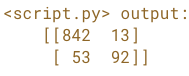

Previous confusion matrix

Analyze the new confusion matrix and select the correct statement from the options below.

Possible Answers
- This classifier made 628 correct predictions, while the previous classifier made 934 correct predictions. As a result, the previous classifier was better.

Incorrect Submission. Incorrect. Remember that since we are using more training data here, we have less data available for testing, so the new classifier does not have as many labels to predict.

- This classifier has a higher recall than the previous classifier.

Incorrect Submission. Incorrect. This classifier has a recall of 63.26%, while the previous classifier had a recall of 63.44%.

- This classifier has a higher precision than the previous classifier.+

- This classifier has a lower accuracy than the previous classifier.

Incorrect Submission. Incorrect. This classifier actually has a slightly higher accuracy than the previous classifier.

In [126]:
# New confusion matrix from the lab

#<script.py> output:
#    [[561   8]
#     [ 28  70]]

### Computing precision and recall

The sklearn.metrics submodule has many functions that allow you to easily calculate interesting metrics. So far, you've calculated precision and recall by hand - this is important while you develop your intuition for both these metrics.

In practice, once you do, you can leverage the precision_score and recall_score functions that automatically compute precision and recall, respectively. Both work similarly to other functions in sklearn.metrics - they accept 2 arguments: the first is the actual labels (y_test), and the second is the predicted labels (y_pred).

Let's now try a training size of 90%.

Instructions 1/3
- Import precision_score from sklearn.metrics.
- Print the precision of the classifier.

In [143]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Create feature variable
X = telco.drop(['Churn','State','Avg_Night_Calls'], axis=1)

# Create target variable
y = telco['Churn']

# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the training data
clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

# Import precision_score
from sklearn.metrics import precision_score

# Print the precision
print(precision_score(y_test,y_pred))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(f'precision (manually): {cm[1,1]/(cm[1,1]+cm[0,1])}')

0.918918918918919
[[284   3]
 [ 13  34]]
precision (manually): 0.918918918918919


- Update your code to calculate the recall_score instead of the precision_score.

In [144]:
# Import precision_score
from sklearn.metrics import recall_score

# Print the precision
print(recall_score(y_test,y_pred))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(f'precision (manually): {cm[1,1]/(cm[1,1]+cm[1,0])}')

0.723404255319149
[[284   3]
 [ 13  34]]
precision (manually): 0.723404255319149


## Other model metrics

9 Other model metrics.mp4

### ROC curve

Let's now create an ROC curve for our random forest classifier. The first step is to calculate the predicted probabilities output by the classifier for each label using its .predict_proba() method. Then, you can use the roc_curve function from sklearn.metrics to compute the false positive rate and true positive rate, which you can then plot using matplotlib.

A RandomForestClassifier with a training set size of 70% has been fit to the data and is available in your workspace as clf.

Instructions 1/4
- Compute the predicted probabilities of clf.
- Import roc_curve from sklearn.metrics.
- Use roc_curve() to calculate the false positive rate, true positive rate, and thresholds. Unpack the output into the variables fpr, tpr, and thresholds.
- Use plt.plot() to plot the fpr on the x-axis and tpr on the y-axis.

In [145]:
# Generate the probabilities
y_pred_prob = clf.predict_proba(X_test)[:, 1]
print(y_pred_prob[:5])
print(clf.predict_proba(X_test)[:5])

[0.02 0.04 0.26 0.67 0.03]
[[0.98 0.02]
 [0.96 0.04]
 [0.74 0.26]
 [0.33 0.67]
 [0.97 0.03]]


[0. 0. 0. 0. 0.]
[0.         0.0212766  0.04255319 0.08510638 0.17021277]
[1.99 0.99 0.98 0.96 0.87]


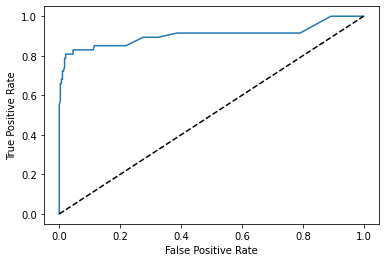

In [146]:
# Import roc_curve
from sklearn.metrics import roc_curve

# Calculate the roc metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
print(fpr[:5])
print(tpr[:5])
print(thresholds[:5])
# Plot the ROC curve
plt.plot(fpr,tpr)

# Add labels and diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()

### Area under the curve

The ROC curve from the previous exercise is viewable on the right. Visually, it looks like a well-performing model. Let's quantify this by computing the area under the curve.

Instructions 1/2
- Import roc_auc_score from sklearn.metrics.
- Print the area under the ROC curve.

In [147]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Print the AUC
print(roc_auc_score(y_test,y_pred_prob))

0.9044777225887759


Great work! This indicates that this baseline random forest classifier is quite good!

### Precision-recall curve

Another way to evaluate model performance is using a precision-recall curve, which shows the tradeoff between precision and recall for different thresholds.

On the right, a precision-recall curve has been generated. Spend some time studying it and then select the statement below that is not true.

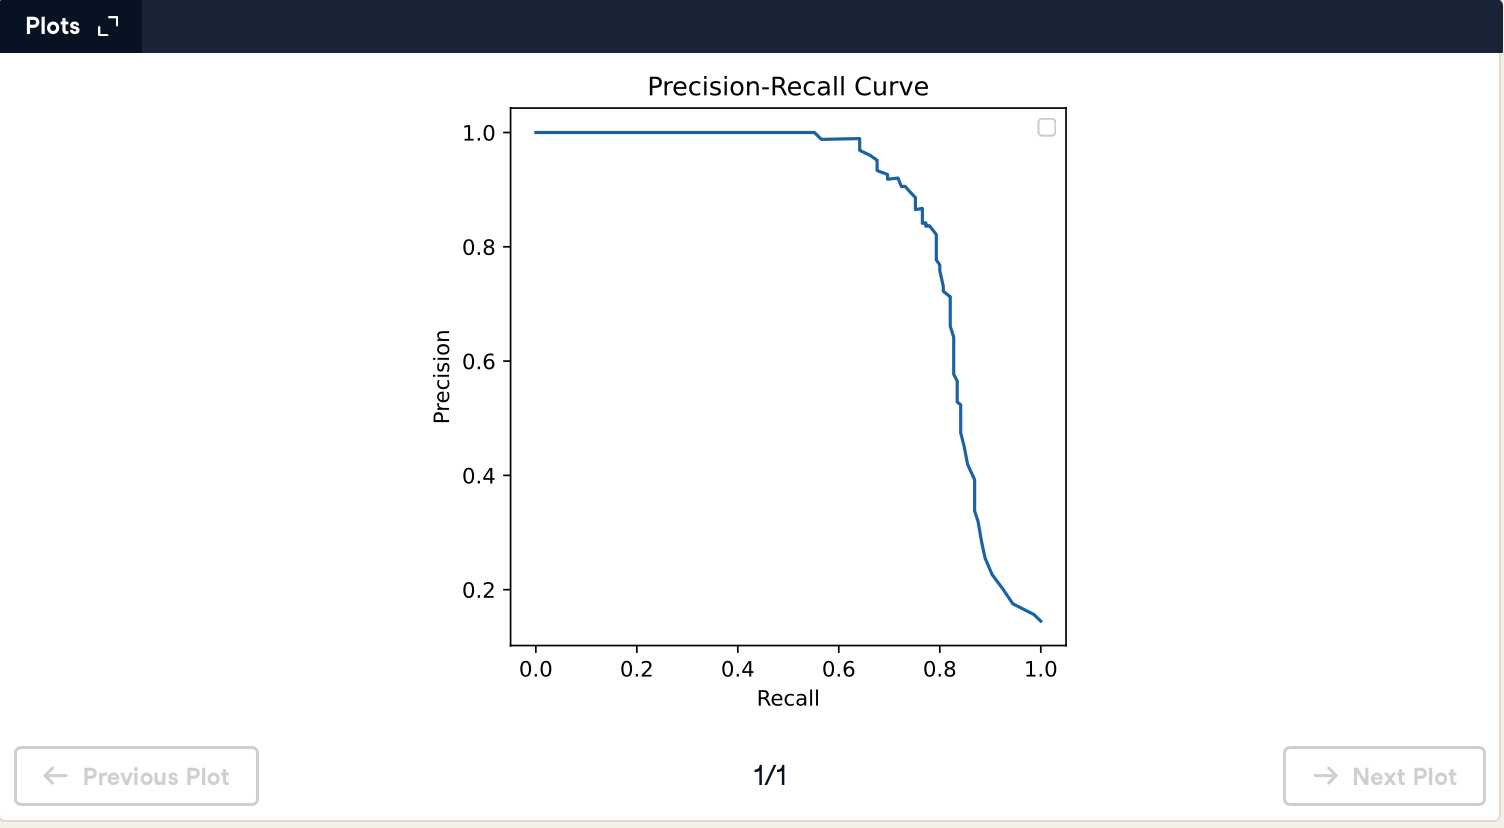

Instructions

Possible Answers
- This curves summarize the tradeoff between the true positive rate and the positive predictive value.

Incorrect Submission. This is a true statement.

- A high area under the curve represents both high recall and high precision.

Incorrect Submission. This is a true statement.

- Recall is synonymous with specificity, and precision is identical with positive predictive value.

Great job! Recall is actually synonymous with sensitivity.

- Precision-recall curves tend to be more informative when you have imbalanced classes.

Incorrect Submission. This is a true statement.

### F1 score

As you've discovered, there's a tradeoff between precision and recall. Both are important metrics, and depending on how the business is trying to model churn, you may want to focus on optimizing one over the other. Often, stakeholders are interested in a single metric that can quantify model performance. The AUC is one metric you can use in these cases, and another is the F1 score, which is calculated as below:

2 * (precision * recall) / (precision + recall)
The advantage of the F1 score is it incorporates both precision and recall into a single metric, and a high F1 score is a sign of a well-performing model, even in situations where you might have imbalanced classes. In scikit-learn, you can compute the f-1 score using using the f1_score function.

Instructions
- Import f1_score from sklearn.metrics.
- Print the F1 score of the trained random forest.

In [148]:
# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the training data
clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

# Import f1_score
from sklearn.metrics import f1_score

# Print the F1 score
print(f1_score(y_test,y_pred))

0.7951807228915662


Fantastic work, and congratulations on completing Chapter 3! It's now time to learn how to boost model performance using hyperparameter tuning.

## Tuning your model
11 Tuning your model.mp4


### Tuning the number of features

The default hyperparameters used by your models are not optimized for your data. The goal of grid search cross-validation is to identify those hyperparameters that lead to optimal model performance. In the video, you saw how the random forest's n_estimators hyperparameter was tuned. Here, you'll practice tuning the max_features hyperparameter. The cv hyperparameter is set to 3 so that the code executes quickly.

Hyperparameter	Purpose

max_features	Number of features for best split

A random forest is an ensemble of many decision trees. The n_estimators hyperparameter controls the number of trees to use in the forest, while the max_features hyperparameter controls the number features the random forest should consider when looking for the best split at decision tree.

A random forest classifier has been instantiated for you as clf.

Instructions 1/4
- Import GridSearchCV from sklearn.model_selection.
- Specify the hyperparameter grid by creating a dictionary with 'max_features' as the key and a list consisting of 'auto', 'sqrt', 'log2' as the value.
- Perform grid search cross-validation using GridSearchCV. First, instantiate the estimator, and then fit it to the data.
- Print the optimal value for 'max_features' using the .best_params_ attribute of grid_search.


In [151]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
param_grid = {'max_features': ['auto', 'sqrt', 'log2']}

# Call GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=3)

# Fit the model
grid_search.fit(X, y)
#print(X[:5])
#print(y[:5])

# Print the optimal parameters
print(grid_search.best_params_)

{'max_features': 'log2'}


Great work! It looks like taking a log of the number of features leads to optimal model performance. By default, the model takes the square root of the number of features.

### Tuning other hyperparameters

The power of GridSearchCV really comes into play when you're tuning multiple hyperparameters, as then the algorithm tries out all possible combinations of hyperparameters to identify the best combination. Here, you'll tune the following random forest hyperparameters:

Hyperparameter	Purpose

criterion	Quality of Split

max_features	Number of features for best split

max_depth	Max depth of tree

bootstrap	Whether Bootstrap samples are used

The hyperparameter grid has been specified for you, along with a random forest classifier called clf.

Instructions 1/3
- Instantiate the GridSearchCV object using clf and param_grid.
- Fit grid_search to X and y.

In [152]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# Call GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=3)

# Fit the model
grid_search.fit(X,y)

# Print the best hyperparameters
print(grid_search.best_params_) 

{'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 10}


Question

Use the .best_params_ attribute of grid_search to identify the best combination of parameters, hit "Run Code", and then select the correct option.

Possible Answers

- {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 10}+
- {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 10}
- {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 10}
- {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 3}

Indeed! Notice how the grid search took longer this time. That's because the grid to search through was larger compared to the previous exercise.

### Randomized search

-- Call GridSearchCV

grid_search = GridSearchCV(clf, param_grid)

-- Fit the model

grid_search.fit(X, y)

In the above chunk of code from the previous exercise, you may have noticed that the first line of code did not take much time to run, while the call to .fit() took several seconds to execute.

This is because .fit() is what actually performs the grid search, and in our case, it was grid with many different combinations. As the hyperparameter grid gets larger, grid search becomes slower. In order to solve this problem, instead of trying out every single combination of values, we could randomly jump around the grid and try different combinations. There's a small possibility we may miss the best combination, but we would save a lot of time, or be able to tune more hyperparameters in the same amount of time.

In scikit-learn, you can do this using RandomizedSearchCV. It has the same API as GridSearchCV, except that you need to specify a parameter distribution that it can sample from instead of specific hyperparameter values. Let's try it out now! The parameter distribution has been set up for you, along with a random forest classifier called clf.

Instructions 1/3
- Import RandomizedSearchCV from sklearn.model_selection.
- Notice how "max_features" has been specified. Call RandomizedSearchCV using clf and param_dist.
- Perform the randomized search by fitting to the data and then print the best parameters.

In [156]:
# Import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from random import randint

# Create the hyperparameter grid
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# Call RandomizedSearchCV
random_search = RandomizedSearchCV(clf, param_dist, cv=3)

# Fit the model
random_search.fit(X,y)

# Print best parameters
print(random_search.best_params_)

TypeError: Parameter value is not iterable or distribution (key='max_features', value=9)

## Feature importances

12 Feature importances.mp4

### Visualizing feature importances

Your random forest classifier from earlier exercises has been fit to the telco data and is available to you as clf. Let's visualize the feature importances and get a sense for what the drivers of churn are, using matplotlib's barh to create a horizontal bar plot of feature importances.

Instructions
- Calculate the feature importances of clf.
- Use plt.barh() to create a horizontal bar plot of importances.

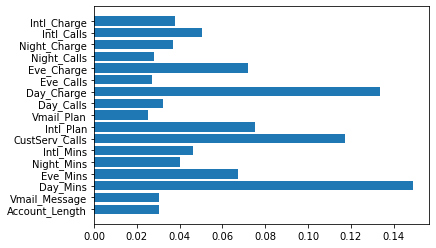

In [162]:
# Calculate feature importances
importances = clf.feature_importances_

# Create plot
#plt.barh(range(X.shape[1]), importances)
plt.barh(X.columns.values, importances)
plt.show()

In [161]:
print(X.columns.values)
print(range(X.shape[1]))

['Account_Length' 'Vmail_Message' 'Day_Mins' 'Eve_Mins' 'Night_Mins'
 'Intl_Mins' 'CustServ_Calls' 'Intl_Plan' 'Vmail_Plan' 'Day_Calls'
 'Day_Charge' 'Eve_Calls' 'Eve_Charge' 'Night_Calls' 'Night_Charge'
 'Intl_Calls' 'Intl_Charge']
range(0, 17)


Well done! But this is not any easier to interpret... let's sort the importances and add labels so we can properly interpret the plot.

### Improving the plot

In order to make the plot more readable, we need to do achieve two goals:

Re-order the bars in ascending order.
Add labels to the plot that correspond to the feature names.
To do this, we'll take advantage of NumPy indexing. The .argsort() method sorts an array and returns the indices. We'll use these indices to achieve both goals.

Instructions
- Calculate the sorted indices of importances by using np.argsort() on importances.
- Create the sorted labels by accessing the columns of X and indexing by sorted_index.
- Create the plot by indexing importances using sorted_index and specifying the keyword argument tick_label=labels.

[ 8 11 13  1  0  9 14 16  4  5 15  3 12  7  6 10  2]
[0.03048811 0.03014717 0.14904235 0.06749202 0.04032262 0.04637878
 0.11748723 0.07498769 0.02522531 0.03229512 0.13368422 0.02720678
 0.07198758 0.02811705 0.03681274 0.05045438 0.03787085]


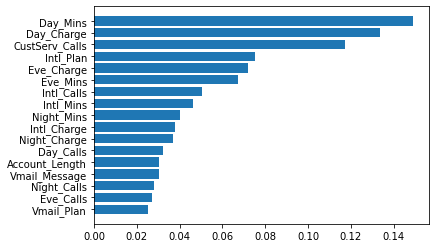

In [164]:
# Sort importances
sorted_index = np.argsort(importances)
print(sorted_index)
print(importances)

# Create labels
labels = X.columns[sorted_index]

# Clear current plot
plt.clf()

# Create plot
plt.barh(range(X.shape[1]), importances[sorted_index], tick_label=labels)
plt.show()

Vmail_Plan        0.025225
Eve_Calls         0.027207
Night_Calls       0.028117
Vmail_Message     0.030147
Account_Length    0.030488
Day_Calls         0.032295
Night_Charge      0.036813
Intl_Charge       0.037871
Night_Mins        0.040323
Intl_Mins         0.046379
Intl_Calls        0.050454
Eve_Mins          0.067492
Eve_Charge        0.071988
Intl_Plan         0.074988
CustServ_Calls    0.117487
Day_Charge        0.133684
Day_Mins          0.149042
dtype: float64


<BarContainer object of 17 artists>

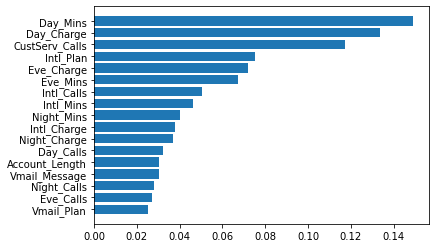

In [179]:
# AK: another way
df = pd.Series(data=importances,index=X.columns.values)
df.sort_values(inplace=True,ascending=True)
print(df)
plt.barh(df.index.values,df.values)

In [167]:
?pd.DataFrame

In [174]:
?pd.DataFrame.sort_values

Super! Now you have a good understanding of which features are important in driving churn.

Take a look at the feature importance plot you just made and select the correct option below.

Possible Answers

- CustServ_Calls, Day_Mins and Day_Charge are not important in predicting churn.
- Intl_Charge is more important than Intl_Calls in predicting churn.
- Vmail_Plan is the least important feature in predicting churn.+
- Night_Mins and Night_Charge are equally important in predicting churn.
press


Correct! The plot tells us that CustServ_Calls, Day_Mins and Day_Charge are the most important drivers of churn. What if we added additional sources of data and more features? Let's explore this now.

## Adding new features
13 Adding new features.mp4

### Does model performance improve?

6 new features have been added to the telco DataFrame:

- Region_Code
- Cost_Call
- Total_Charge
- Total_Minutes
- Total_Calls
- Min_Call
- Will this improve the churn model? Let's find out!

Instructions 1/3
- Create training and test sets using X and y. Hold 30% of the data for testing.
- Instantiate a RandomForestClassifier as clf and fit it to the training data.
- Print the accuracy of the trained classifier using .score().

In [181]:
telco.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Avg_Night_Calls
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,110,45.07,99,16.78,91,11.01,3,2.70,KS,2.689011
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,123,27.47,103,16.62,103,11.45,3,3.70,OH,2.469903
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,NJ,1.563462
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,71,50.90,88,5.26,89,8.86,7,1.78,OH,2.212360
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,113,28.34,122,12.61,121,8.41,3,2.73,OK,1.544628


In [187]:
telco['Total_Calls'] = telco['Day_Calls'] + telco['Eve_Calls'] + telco['Night_Calls'] + telco['Intl_Calls']
telco['Total_Charge'] = telco['Day_Charge'] + telco['Eve_Charge'] + telco['Night_Charge'] + telco['Intl_Charge']
telco['Total_Minutes'] = telco['Day_Mins'] + telco['Eve_Mins'] + telco['Night_Mins'] + telco['Intl_Mins']
telco['Cost_Call'] = round(telco['Total_Charge'] / telco['Total_Calls'],2)
telco['Call_Cost'] = round(telco['Total_Calls'] / telco['Total_Charge'],2)
telco['Min_Call'] = round(telco['Total_Minutes'] / telco['Total_Calls'],2)
telco.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,Intl_Calls,Intl_Charge,State,Avg_Night_Calls,Total_Calls,Total_Charge,Total_Minutes,Cost_Call,Min_Call,Call_Cost
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,...,3,2.70,KS,2.689011,303,75.56,717.2,0.25,2.37,4.01
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,...,3,3.70,OH,2.469903,332,59.24,625.2,0.18,1.88,5.60
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,...,5,3.29,NJ,1.563462,333,62.29,539.4,0.19,1.62,5.35
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,...,7,1.78,OH,2.212360,255,66.80,564.8,0.26,2.21,3.82
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,...,3,2.73,OK,1.544628,359,52.09,512.0,0.15,1.43,6.89


In [188]:
# Create feature variable
X = telco.drop(['Churn','State','Avg_Night_Calls'], axis=1)

# Create target variable
y = telco['Churn']

In [190]:
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

In [191]:
# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the data
clf.fit(X_train,y_train)

RandomForestClassifier()

In [192]:
# Print the accuracy
print(clf.score(X_test,y_test))

0.967


### Computing other metrics

In addition to accuracy, let's also compute the F1 score of this new model to get a better picture of model performance.

A 70-30 train-test split has already been done for you, and all necessary modules have been imported.

Instructions
100 XP
Predict the labels of the test set.
Print the F1 score.

In [193]:
# Predict the labels of the test set
y_pred = clf.predict(X_test)

# Print the F1 score
print(f1_score(y_test,y_pred))

0.8695652173913044


Excellent work, and congratulations on completing the final exercise of the course!